# 1.3.1 Визуализация непрерывных распределений и их характеристик на python

In [ ]:
# расширяем поле ноутбука для удобства
from IPython.core.display import display, HTML
display(HTML('<style>.container {width:95% !important;}</style>'))

# убираем предупреждения
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [ ]:
import scipy.stats as sps

# 1. Непрерывные распределения

- 1. Нормальное.
- 2. Экспоненциальное (показательное).
- 3. Равномерное.
- 4. Парето.

## 1.1 Нормальное распределение

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm

### Пояснение

Нормальным называется распределение вероятностей, которое для одномерного случая задаётся функцией Гаусса:

$$f(x) = \frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{(x-\mu)^2}{2\sigma ^2}}$$

Нормальное распределение играет важнейшую роль во многих областях знаний. Случайная величина подчиняется нормальному закону распределения, когда она подвержена влиянию большого числа случайных факторов, что является типичной ситуацией в анализе данных. Поэтому нормальное распределение служит хорошей моделью для многих реальных процессов.

### Обозначение

$X \sim N(\mu, \sigma^2) $

### Параметры

$\mu$ — коэффициент сдвига (вещественный);  
$\sigma > 0$ — коэффициент масштаба (вещественный, строго положительный).

### Математическое ожидание

$$E(X) = \mu$$

### Дисперсия 

$$Var[X] = \sigma^2$$

### Построение графиков

In [ ]:
mu = 0
sigma = 1

rv_norm = sps.norm(mu, sigma)

print('Математическое ожидание: ', rv_norm.mean())
print('Дисперсия: ', rv_norm.var())

Математическое ожидание:  0.0
Дисперсия:  1.0


In [ ]:
# Формирование выборки
sample = rv_norm.rvs(size=200)

print('Выборочное среднее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

Выборочное среднее: 0.118
Выборочная дисперсия: 1.045


### Функция плотности вероятности (PDF)

$$f(x) = \frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{(x-\mu)^2}{2\sigma ^2}}$$

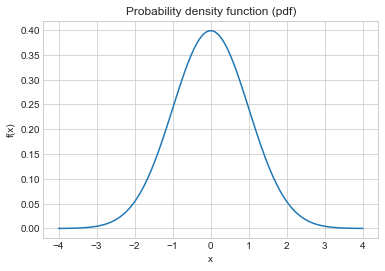

In [ ]:
X = np.linspace(-4, 4, 100)
plt.plot(X, rv_norm.pdf(X))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Probability density function (pdf)')
plt.show()

### Функция распределения (CDF)

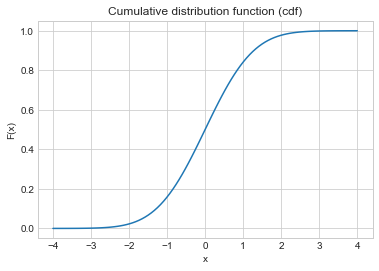

In [ ]:
X = np.linspace(-4, 4, 100)
plt.plot(X, rv_norm.cdf(X))
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Cumulative distribution function (cdf)')
plt.show()

## 1.2 Показательное распределение

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon

### Пояснение

Экспоненциальное (или показательное) распределение — абсолютно непрерывное распределение, моделирующее время между двумя последовательными свершениями одного и того же события.

Показательное распределение широко используется в теории надёжности.
Допустим, некоторое устройство начинает работать в момент времени $T_0=0$, а через какое-то время T происходит отказ устройства.
Обозначим Т непрерывную случайную величину — длительность безотказной работы устройства.

Пусть переменная «икс» обозначает время и в какой-то начальный момент времени начинает эксплуатироваться некий прибор, например, обычная лампочка. Случайная величина — время  работы лампочки до перегорания.

### Обозначение

$X \sim Exp(\lambda) $

### Параметры

$ \lambda \geq 0$ - интенсивность

### Математическое ожидание

$$E(X) = \frac{1}{\lambda}$$

### Дисперсия 

$$Var[X] = \frac{1}{\lambda ^2}$$

### Построение графиков

In [ ]:
rv_exp = sps.expon(loc=0, scale=1)

print('Математическое ожидание: ', rv_exp.mean())
print('Дисперсия: ', rv_exp.var())

Математическое ожидание:  1.0
Дисперсия:  1.0


In [ ]:
# Формирование выборки
sample = rv_exp.rvs(size=200)

print('Выборочное среднее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

Выборочное среднее: 0.976
Выборочная дисперсия: 0.814


### Функция плотности вероятности (PDF)

$$f(x)=\lambda e^{-\lambda x}, x \geq 0$$, в остальных случаях 0

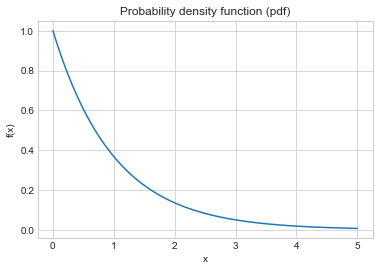

In [ ]:
X = np.linspace(0,5,100)
plt.plot(X, rv_exp.pdf(X))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Probability density function (pdf)')
plt.show()

### Функция распределения (CDF)

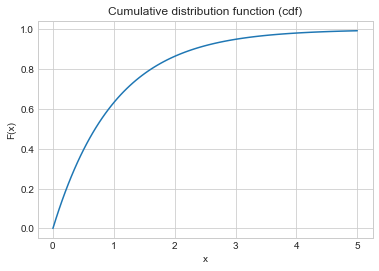

In [ ]:
X = np.linspace(0,5,100)
plt.plot(X, rv_exp.cdf(X))
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Cumulative distribution function (cdf)')
plt.show()

## 1.3 Равномерное распределение

### Пояснение

Непрерывное равномерное распределение в теории вероятностей — распределение случайной вещественной величины, принимающей значения, принадлежащие некоторому промежутку конечной длины, характеризующееся тем, что плотность вероятности на этом промежутке почти всюду постоянна.

Равномерное распределение часто используется для моделирования произвольных событий, если каждый потенциальный результат или явление имеет одинаковую вероятность возникновения.

### Обозначение

$X \sim U(a, b) $

### Параметры

a — коэффициент сдвига,          
b-a — коэффициент масштаба

### Математическое ожидание

$$E(X) = \frac{a+b}{2}$$

### Дисперсия 

$$Var[X] = \frac{(b-a)^2}{12}$$

### Построение графиков

In [ ]:
a, b = 0, 1
rv_uniform = sps.uniform(loc=a, scale=b-a)

print('Математическое ожидание: ', rv_uniform.mean())
print('Дисперсия: ', rv_uniform.var())

Математическое ожидание:  0.5
Дисперсия:  0.08333333333333333


In [ ]:
# Формирование выборки
sample = rv_uniform.rvs(size=200)

print('Выборочное среднее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

Выборочное среднее: 0.527
Выборочная дисперсия: 0.079


### Функция плотности вероятности (PDF)

$$f(x)=\frac{1}{b-a}, x \in [a, b]$$, в остальных случаях 0

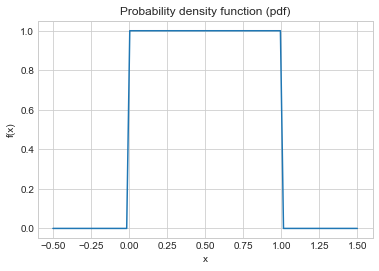

In [ ]:
X = np.linspace(-0.5, 1.5, 100)
plt.plot(X, rv_uniform.pdf(X))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Probability density function (pdf)')
plt.show()

### Функция распределения (CDF)

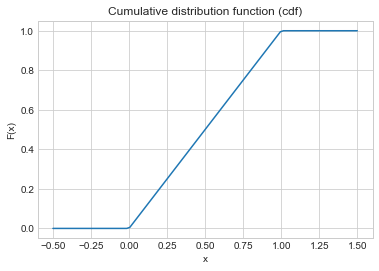

In [ ]:
X = np.linspace(-0.5, 1.5,100)
plt.plot(X, rv_uniform.cdf(X))
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Cumulative distribution function (cdf)')
plt.show()

## 1.4 Распределение Парето

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pareto.html#scipy.stats.pareto

### Пояснение

Распределение Парето в теории вероятностей — двухпараметрическое семейство абсолютно непрерывных распределений, являющихся степенными. Называется по имени Вилфредо Парето. Встречается при исследовании различных явлений, в частности, социальных, экономических и физических. Вне области экономики иногда называется также распределением Брэдфорда.

Вилфредо Парето изначально использовал это распределение для описания распределения благосостояния, а также распределения дохода. Его «правило 20 к 80» (которое гласит: 20 % популяции владеет 80 % богатства) однако зависит от конкретной величины k, и утверждается, что фактически встречаются существенные количественные отклонения, например, данные самого Парето по Британии в его труде «Курс политической экономии» говорят, что там примерно 30 % населения владеет 70 % общего дохода.

Распределение Парето встречается не только в экономике.

В лингвистике распределение Парето известно под именем закона Ципфа (для разных языков показатель степени может несколько различаться, также существует небольшое отклонение от простой степенной зависимости у самых частотных слов, однако в целом степенной закон описывает это распределение достаточно хорошо). Частными проявлениями этой закономерности можно считать:
- Зависимость абсолютной частоты слов (сколько всего раз каждое конкретное слово встретилось) в достаточно длинном тексте от ранга (порядкового номера при упорядочении слов по абсолютной частоте). Степенной характер остается вне зависимости от того, приводятся ли слова к начальной форме или берутся из текста как есть.
- Аналогичная кривая для популярности имён.
- Распределение размера населённых пунктов.

### Обозначение

$X \sim P(k, x_m) $

### Параметры

$x_m > 0$ — коэффициент масштаба          
$k>0$

### Математическое ожидание

$$E(X) = {\displaystyle {\frac {kx_{\text{m}}}{k-1}}}, если {\displaystyle k>1}$$

### Дисперсия 

$$Var[X] = {\displaystyle \left({\frac {x_{\text{m}}}{k-1}}\right)^{2}{\frac {k}{k-2}}} при {\displaystyle k>2}$$

### Построение графиков

In [ ]:
rv_pareto = sps.pareto(b = 2.62, loc=0, scale=1)

print('Математическое ожидание: ', rv_pareto.mean())
print('Дисперсия: ', rv_pareto.var())

Математическое ожидание:  1.6172839506172838
Дисперсия:  1.6101990746886534


In [ ]:
# Формирование выборки
sample = rv_pareto.rvs(size=200)

print('Выборочное среднее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

Выборочное среднее: 1.785
Выборочная дисперсия: 2.512


### Функция плотности вероятности (PDF)

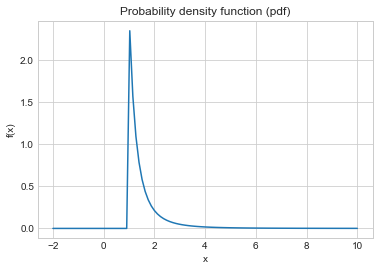

In [ ]:
X = np.linspace(-2, 10, 100)
plt.plot(X, rv_pareto.pdf(X))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Probability density function (pdf)')
plt.show()

### Функция распределения (CDF)

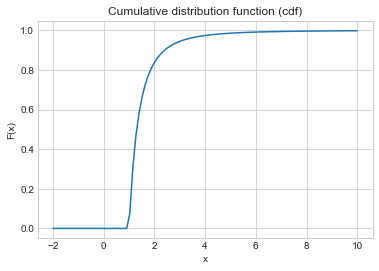

In [ ]:
X = np.linspace(-2, 10,100)
plt.plot(X, rv_pareto.cdf(X))
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Cumulative distribution function (cdf)')
plt.show()